***
# Introduction
The purpose of this study is to find the best model to predict whether a given mortgage loan application is likely to be approved or denied. We'll conduct K-Nearest Neighbor and Support Vector Machine models to predict the deny situation.  


**Variables:**

The original data set includes 7 categorical variables and 7 numerical variables.

There are 12 variables that can be used as independent variables. 

The 'deny' variable will serve as the dependent variable for our regression model. 

**Procedures:**

Here are the main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Data Cleaning

Step 4: Feature Engineering and Feature Selection

Step 5: K-Nearest Neighbor and Support Vector Machine models Creation

Step 6: Model Eveluation

Step 7: Conclusion

>For **Step 2**, the main components of EDA include
>1. Data exploration - Check the missing value
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Compare the response variables in each discrete and categorical explanatory variables
6. Check Outliers
7. Check Duplicated data
8. Check Correlation



>For **Step 3**, it consists of 6 stages:
1. Drop the missing value row and outliers cleaning
2. Duplicated data Cleaning
3. Rerun EDA

>For **Step 4**, we'll perform:
1. Encode categorical data - create dummy variables
2. Split data into training and testing subsets
3. Scaling numerical values using Standard Scale (except dummy variables)
4. Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - 4c. Reduce features further based on the correlation coefficients from step 4a and VIFs, including Check VIF of all features and Drop feature based on correlation coefficients and VIFs (need all VIFs<10). Then, Set up a final train and test datasets with the best features

>For **Step 6**, we'll perform K-Nearest Neighbor and Support Vector Machine models Regression.
The procedures of this step include:
1. Model selection
2. Test the model to predict using the test dataset
3. Use Statsmodels summary to get the final model's P-value, $R^2$, intercept, and coefficients.
4. Use the final Model for Prediction


**Variable Descriptions:**
1. dir: debt payments to total income ratio, the ratio can be integer or float
2. hir: housing expenses to income ratio, the ratio can be integer or float
3. lvr: the ratio of size of loan to the assessed value of property
4. ccs: consumer credit score from 1 to 6 (a low value is a good score), it should be integer
5. mcs: mortgage credit score from 1 to 4 (a low value is a good score), it should be integer
6. pbcr: if have public bad credit record, the record should be yes or no or NaN
7. dmi: if denied mortgage insurance, the record should be yes or no or NaN 
8. self if self-employed, the record should be yes or no or NaN 
9. single If the applicant is single, the record should be yes or no or NaN 
10. uria: 1989 Massachusetts unemployment rate in the applicant's industry
11. condominium: if the unit is a condominium. The mortgage rates on condominiums are usually higher than what the same borrower would pay if they were purchasing a single-family home on similar terms. That's because condominium mortgages are considered somewhat riskier loans than are mortgages for single-family homes. So, it is a valid attribute.
12. black If the applicant is black, the record should be yes or no or NaN 
13. deny: If a mortgage application is denied, the record should be yes or no or NaN 
14. Unnamed: 0: It is the id of the each applicant, consider the pandas will generate new index columns from 0 to the end, we drop the old index column.

In [110]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [111]:
# read datasource from Github and add column name
data = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/DAV-6150/master/M-DataSource/M7_Data.csv")
# To display the top 5 rows
data.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns
5. Compare the response variables in each discrete and categorical explanatory variables
6. Check Outliers
7. Check Duplicated data
8. Check Correlation



#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [112]:
# check the shape for the dataframe
data.shape

(2381, 14)

In [113]:
#drop the first column
df =data.drop(columns=['Unnamed: 0'])
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [114]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dir,2381.0,0.330814,0.107235,0.00,0.28000,0.330000,0.370000,3.00
hir,2381.0,0.255346,0.096635,0.00,0.21400,0.260000,0.298800,3.00
lvr,2381.0,0.737760,0.178715,0.02,0.65285,0.779412,0.868421,1.95
ccs,2381.0,2.116387,1.666370,1.00,1.00000,1.000000,2.000000,6.00
mcs,2381.0,1.721008,0.537169,1.00,1.00000,2.000000,2.000000,4.00
uria,2381.0,3.774496,2.026636,1.80,3.10000,3.200000,3.900000,10.60
comdominiom,2381.0,0.288114,0.452980,0.00,0.00000,0.000000,1.000000,1.00


In [115]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues
dir,float64,520,0,2381,1
hir,float64,501,0,2381,3
lvr,float64,1538,0,2381,0
ccs,float64,7,0,2381,0
mcs,float64,5,0,2381,0
pbcr,object,2,1,2380,0
dmi,object,2,0,2381,0
self,object,2,1,2380,0
single,object,2,0,2381,0
uria,float64,11,0,2381,0


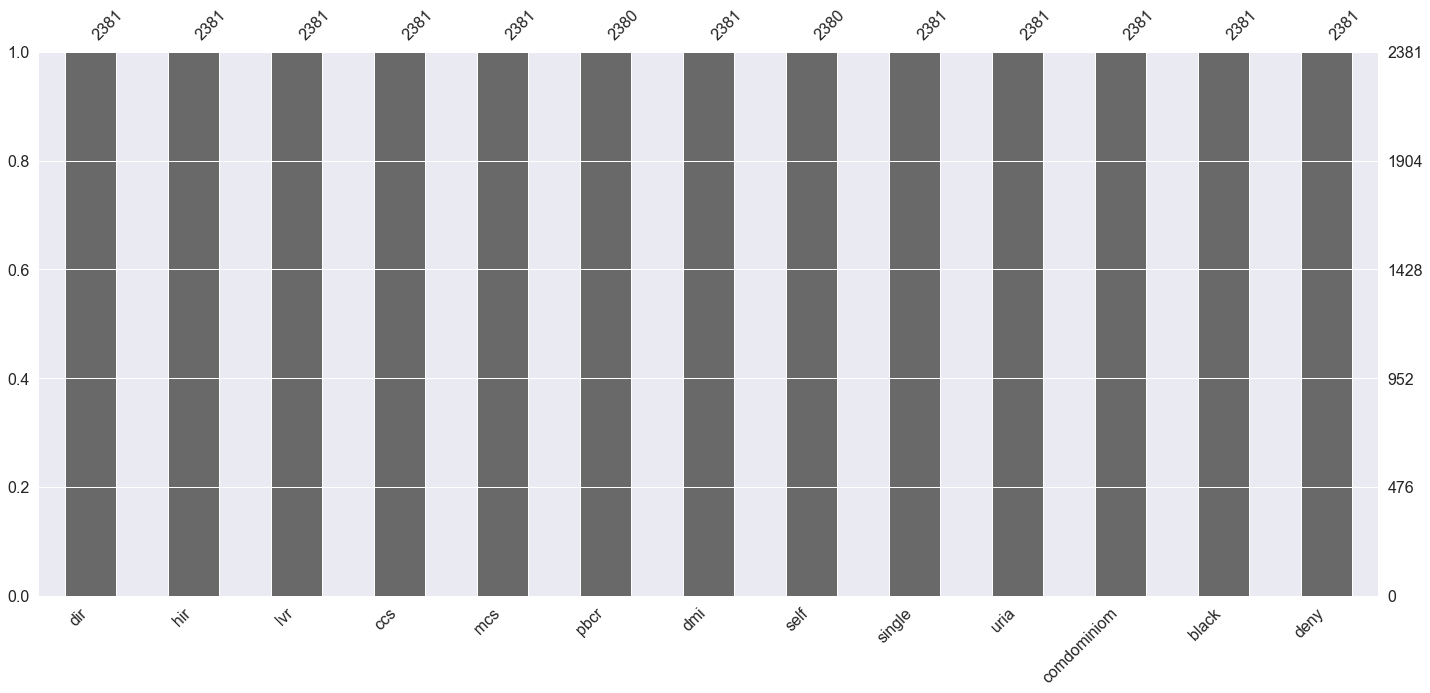

In [116]:
#first import missingno after pip install
import missingno as msno
#visualize the amount of missing data using missingno's bar chart
msno.bar(df)

#### Findings:

>1. The dataset consists of 13 useful variables and 2381 observations.We drop 1 unnamed column. 
2. There is only 1 missing value in column self and pbcr.
3. The types of data are the object, integer, and float, and comdominiom should be categorical attributes because it just contains 0 and 1.0 represent no, 1 represents yes.
4. There are no negative values. All minimum values for each column are at least 0.

#### 2. Check numerical and categorical columns

In [117]:
# since comdominiom is categorical variable, we will deal with it separately 

numerical_columns = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print('Numerical variables:',numerical_columns)
print('Categorical variables:',categorical_columns)

Numerical variables: ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom']
Categorical variables: ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']


#### Findings:
> 1. We can know the numerical variables of the original dataset are 6 attributes, including dir, hir, lvr, ccs, mcs, uria.
2. Although the data type of comdominiom is numerical, it is the categorical data. 0 represents the unit is not comdominiom, 1 represents the unit is comdominiom.
3. The categorical variables of the original dataset include 16 attributes, including pbcr, dmi, self, single, black, deny, and comdominiom.

#### 3. Visualize numerical columns

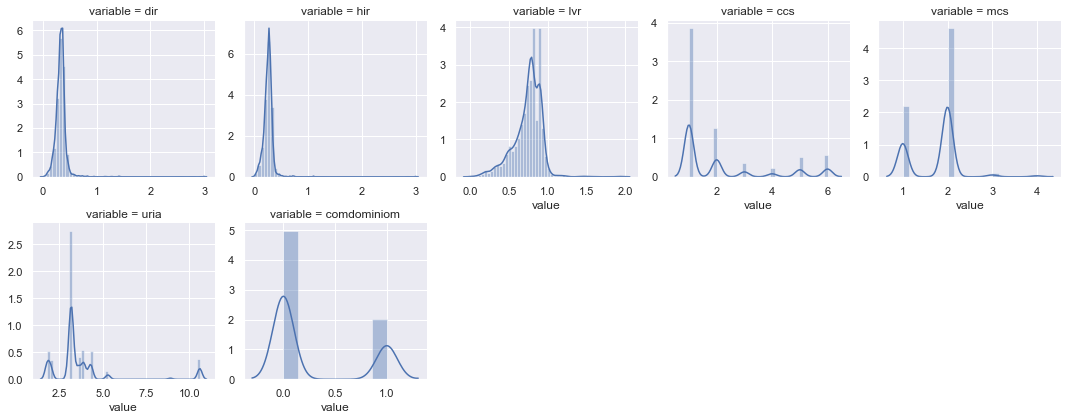

In [118]:
# Distributions for each of numerical variables.
nd = pd.melt(df[numerical_columns])
n1 = sns.FacetGrid (nd, col='variable', col_wrap=5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Findings: 
>1. From this visualization, we can see that dir and hir have outliers. 
2. Most people have a great consumer credit score(ccs), 1 or 2. 
3. Most people have a great mortgage credit score(mcs), 1 or 2.
4. The main Massachusetts unemployment rate for each applicants' industries in 1989 was around 3.

#### 4. Visualize categorical columns

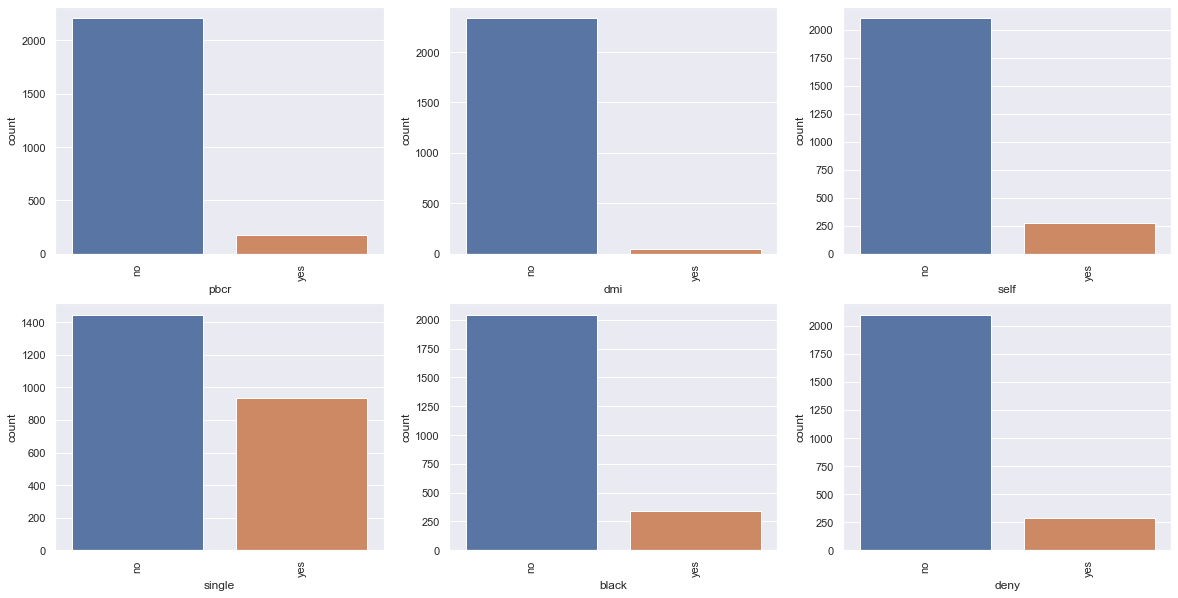

In [119]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

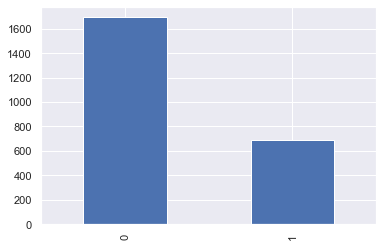

In [120]:
# create the bar chart for categorical value comdominiom, 0 = no, 1 = yes
df['comdominiom'].value_counts().plot(kind='bar')

#### 5. Compare the response variables in each discrete and categorical explanatory variables 
-  The discrete attributes are ccs and mcs. Their range is from 1 to 6. A low value is a good score.
-  The categorical variables contain pbcr, dmi, self, single, commdominiom, and black. They all just have 2 unique values except missing value. 

Text(0, 0.5, 'Percentage')

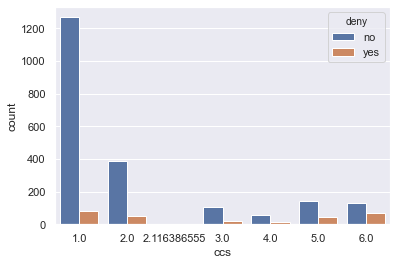

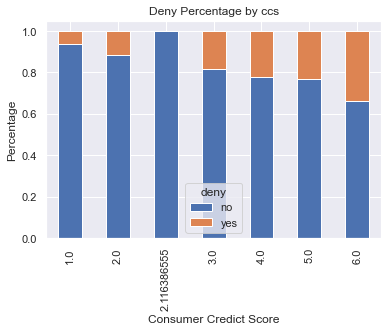

In [121]:
# compare the deny difference in ccs
sns.countplot(x='ccs',hue='deny', data=df)
# check the deny percentage of ccs
deny_ccs = pd.crosstab(df.ccs, df.deny)
deny_ccs.div(deny_ccs.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by ccs')
plt.xlabel('Consumer Credict Score')
plt.ylabel('Percentage')

In [122]:
outlier_ccs = df[df['ccs'].isin(['2.116386555'])]
outlier_ccs

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


#### Findings: 
>1. The number of mortgage application deny is higher when consumer credit scores are lower (1 or 2) and higher (5 or 6). The middle class of consumer credit scores (3 or 4) has low numbers of mortgage application pass, especially have 4 consumer credit scores.
2. The lower consumer credit scores, the higher the number of mortgage applications passes, especially at low level (1 or 2) ccs. The other number of ccs may consider others' influence, so they do not fix this rule.
3. According to domain knowledge, the consumer credit score should be an integer. However, in the ccs column, there is one group is 2.116386555, we should delete these rows.

Text(0, 0.5, 'Percentage')

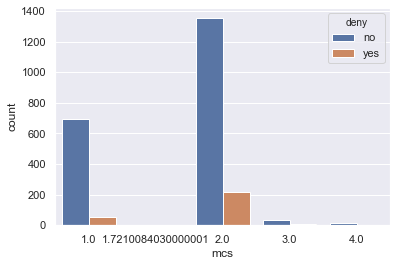

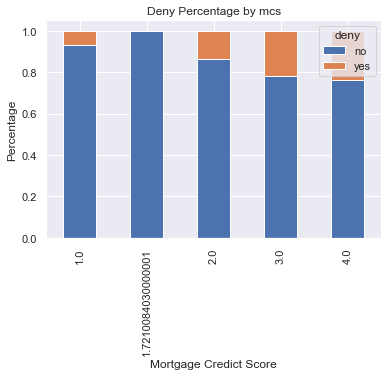

In [123]:
# compare the deny difference in mcs
sns.countplot(x='mcs',hue='deny', data=df)
# check the deny percentage of mcs
deny_mcs = pd.crosstab(df.mcs, df.deny)
deny_mcs.div(deny_mcs.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by mcs')
plt.xlabel('Mortgage Credict Score')
plt.ylabel('Percentage')

In [124]:
outlier_mcs = df[df['mcs'].isin(['1.7210084030000001'])]
outlier_mcs

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


#### Findings: 
>1. The percentage of applicants who have lower mortgage credict scores and has a higher mortgage loan pass rate.
2. There are fewer people who have high mortgage credit scores applying for the mortgage loan.
2. Similar to ccs, we should delete the row that mcs column has 1.7210084030000001 value.

Text(0, 0.5, 'Percentage')

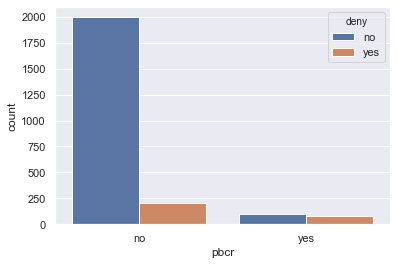

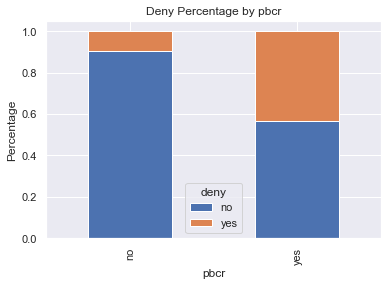

In [125]:
# compare the deny difference in pbcr
sns.countplot(x='pbcr',hue='deny', data=df)
# check the deny percentage of pbcr
deny_pbcr = pd.crosstab(df.pbcr, df.deny)
deny_pbcr.div(deny_pbcr.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by pbcr')
plt.xlabel('pbcr')
plt.ylabel('Percentage')

#### Findings: 
>1. Most people who do not have a public bad credit record would apply for a mortgage loan. And they have a high probability to get the mortgage loan.
2. For people who have a public credit record, they almost have the same number of mortgage applications deny and pass. 
3. The percentage of applicants who do noy have public bad record and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

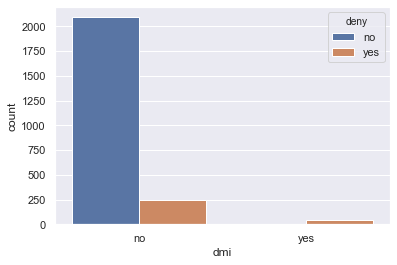

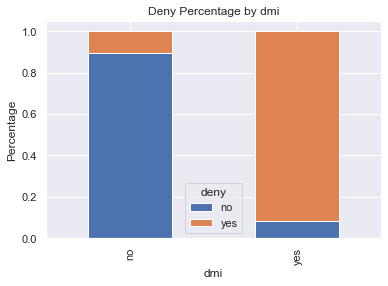

In [126]:
# compare the deny difference in dmi
sns.countplot(x='dmi',hue='deny', data=df)
# check the deny percentage of dmi
deny_dmi = pd.crosstab(df.dmi, df.deny)
deny_dmi.div(deny_dmi.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by dmi')
plt.xlabel('dmi')
plt.ylabel('Percentage')

#### Findings: 
>1. Almost every applicant who reject mortgage insurance does not get the mortgage applications to pass.The percentage of applicants who refuse mortgage insurance and has a higher mortgage loan pass rate.
2. Most applicants who accept mortgage insurance are passed the mortgage applications.

Text(0, 0.5, 'Percentage')

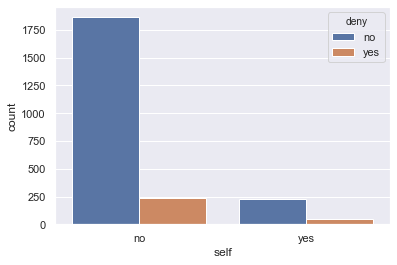

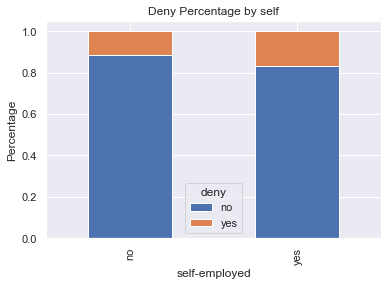

In [127]:
# compare the deny difference in self
sns.countplot(x='self',hue='deny', data=df)
# check the deny percentage of self
deny_self = pd.crosstab(df.self, df.deny)
deny_self.div(deny_self.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by self')
plt.xlabel('self-employed')
plt.ylabel('Percentage')

#### Findings: 
>1. Most applicants who are not self-employed are passed the mortgage applications.
2. Most applicants who want to apply for a mortgage loan are not self-employed.
3. The percentage of applicants who are not self-employed and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

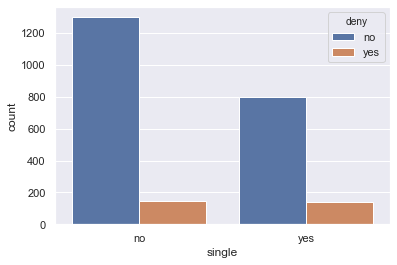

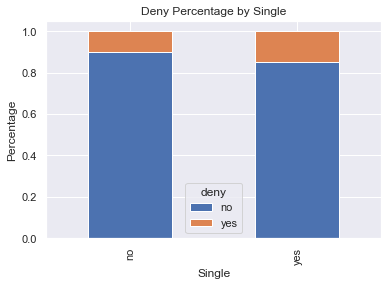

In [128]:
# compare the deny difference in single
sns.countplot(x='single',hue='deny', data=df)
# check the deny percentage of single
deny_single = pd.crosstab(df.single, df.deny)
deny_single.div(deny_single.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Single')
plt.xlabel('Single')
plt.ylabel('Percentage')

#### Findings: 
>1. Most, not single applicants would like to apply for a mortgage loan. 
2. The number of mortgage loans denies for single applicants is almost the same not single. Consider the total applicants of single is more than not single applicants, single applicants have higher mortgage application deny rate.
3. The percentage of applicants who are not single and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

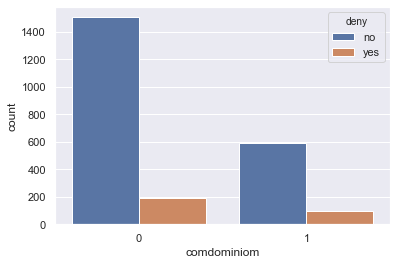

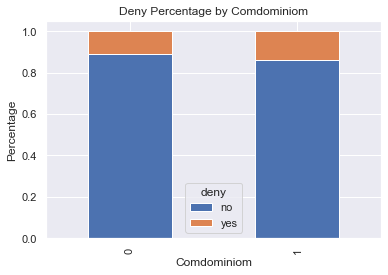

In [129]:
# compare the deny difference in comdominiom
sns.countplot(x='comdominiom',hue='deny', data=df)
# check the deny percentage of comdominiom
deny_comdominiom = pd.crosstab(df.comdominiom, df.deny)
deny_comdominiom.div(deny_comdominiom.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Comdominiom')
plt.xlabel('Comdominiom')
plt.ylabel('Percentage')

#### Findings: 
>1. Most applicants who own house types are not comdominiom.
2. The percentage of applicants who own the house types is not comdominiom and has a higher mortgage loan pass rate.

Text(0, 0.5, 'Percentage')

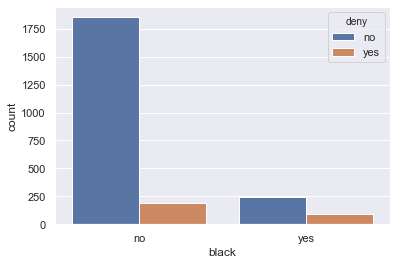

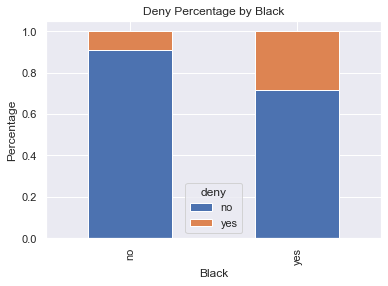

In [130]:
# compare the deny difference in black
sns.countplot(x='black',hue='deny', data=df)
# check the deny percentage of black
deny_black = pd.crosstab(df.black, df.deny)
deny_black.div(deny_black.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Deny Percentage by Black')
plt.xlabel('Black')
plt.ylabel('Percentage')

#### Findings: 
>1. There are fewer black people apply for the mortgage loan.
3. The percentage of applicants who are not black have a higher mortgage loan pass rate.

#### 6. Check Outliers
   We use the standdard deviation to define the outliers whose Z scores are more than 3 (99.7% confident interval).

In [131]:
def remove_outliers(col_name):
    """
    Removing the outliers that are 2.5 standard deviations away from the mean.
    """
    return df[np.abs(df[col_name] - df[col_name].mean() ) > (3 * df[col_name].std() )]

In [132]:
# find all rows that have dir values whose values are > 2.5 standard deviations from the mean of data in that column
dir_outliers = remove_outliers('dir')
print('min:',dir_outliers.dir.min())
print('max',dir_outliers.dir.max())
print('number of outliers:',dir_outliers.shape[0])

min: 0.0
max 3.0
number of outliers: 20


In [133]:
# find all rows that have lvr values whose values are > 2.5 standard deviations from the mean of data in that column
lvr_outliers = remove_outliers('lvr')
print('min:',lvr_outliers.lvr.min())
print('max',lvr_outliers.lvr.max())
print('number of outliers:', lvr_outliers.shape[0])

min: 0.02
max 1.95
number of outliers: 32


In [134]:
# find all rows that have hir values whose values are > 2.5 standard deviations from the mean of data in that column
hir_outliers = remove_outliers('hir')
print('min:',hir_outliers.hir.min())
print('max',hir_outliers.hir.max())
print('number of outliers:',hir_outliers.shape[0])

min: 0.58
max 3.0
number of outliers: 12


In [135]:
# find all rows that have ccs values whose values are > 2.5 standard deviations from the mean of data in that column
ccs_outliers = remove_outliers('ccs')
print('min:',ccs_outliers.ccs.min())
print('max',ccs_outliers.ccs.max())
print('number of outliers:',ccs_outliers.shape[0])

min: nan
max nan
number of outliers: 0


In [136]:
# find all rows that have mcs values whose values are > 2.5 standard deviations from the mean of data in that column
mcs_outliers = remove_outliers('mcs')
print('min:',mcs_outliers.mcs.min())
print('max',mcs_outliers.mcs.max())
print('number of outliers:',mcs_outliers.shape[0])

min: 4.0
max 4.0
number of outliers: 21


In [137]:
# find all rows that have uria values whose values are > 2.5 standard deviations from the mean of data in that column
uria_outliers = remove_outliers('uria')
print('min:',uria_outliers.uria.min())
print('max',uria_outliers.uria.max())
print('number of outliers:',uria_outliers.shape[0])

min: 10.60000038
max 10.60000038
number of outliers: 159


According to the domain knowledge, all values of each column are meaningful. In the real world, these outliers are general, such as many people have a bad Debt-to-Income Ratio. Although the outliers of the dataset are rare, we still keep the outliers.
Consider our dataset is not large and the outliers are around 250, we decide that do not remove any outliers. 

#### 7. Check Duplicated data

In [138]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Unnamed: 0, dir, hir, lvr, ccs, mcs, pbcr, dmi, self, single, uria, comdominiom, black, deny]
Index: []


There is no duplicated row base on Unnamed: 0 column which is the id of each applicant.

#### 8. Check Correlation 

Text(0.5, 1.0, 'Figure 5: Correlations')

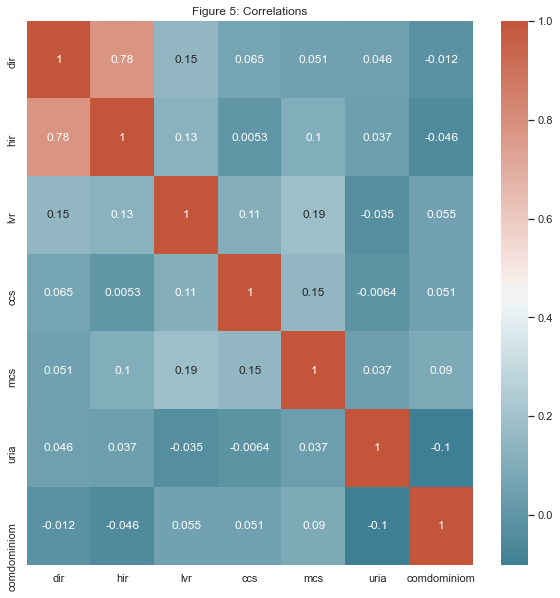

In [139]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,10))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

#### Findings: 
>1. There are strong relationship between hir and dir. 
2. There are weak relationships (correlationno more than 0.2) in three groups which are between dir and lvr, mcs and ccs, mcs and lvr. 
3. There are no obvious relationship in dirrferent groups.

***
### Step 3: Data Cleaning
1. Drop the missing value row and outliers cleaning
2. Duplicated data Cleaning - There are no duplicated data, we do not need to clean it.
3. Rerun EDA

#### 1. Drop the missing value row
Consider there is only one row that contains missing value and the percentage of total dataset is less than 1%, we decide to drop the row. Also, the outlier of ccs and mcs is in the same row.

In [140]:
# extract the rows that contain missing value 
null_data = df[df.isnull().any(axis=1)]
null_data

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [141]:
# drop the missing value row
df1 = df.dropna()
# Show missing value
miss = df1.isnull().sum()
#miss = miss[miss > 0]
#miss.sort_values(inplace=True)
miss

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

#### Findings:

1. There are 7 explanatory variables have missing values, including normalized_losses, num_of_doors, bore, storke, horsepower, peak_rpm, and price.
2. The attributes of normalized_losses, bore, storke, and price  have approximately 20% missing values.
3. There are 179 completed rows without any missing values.

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

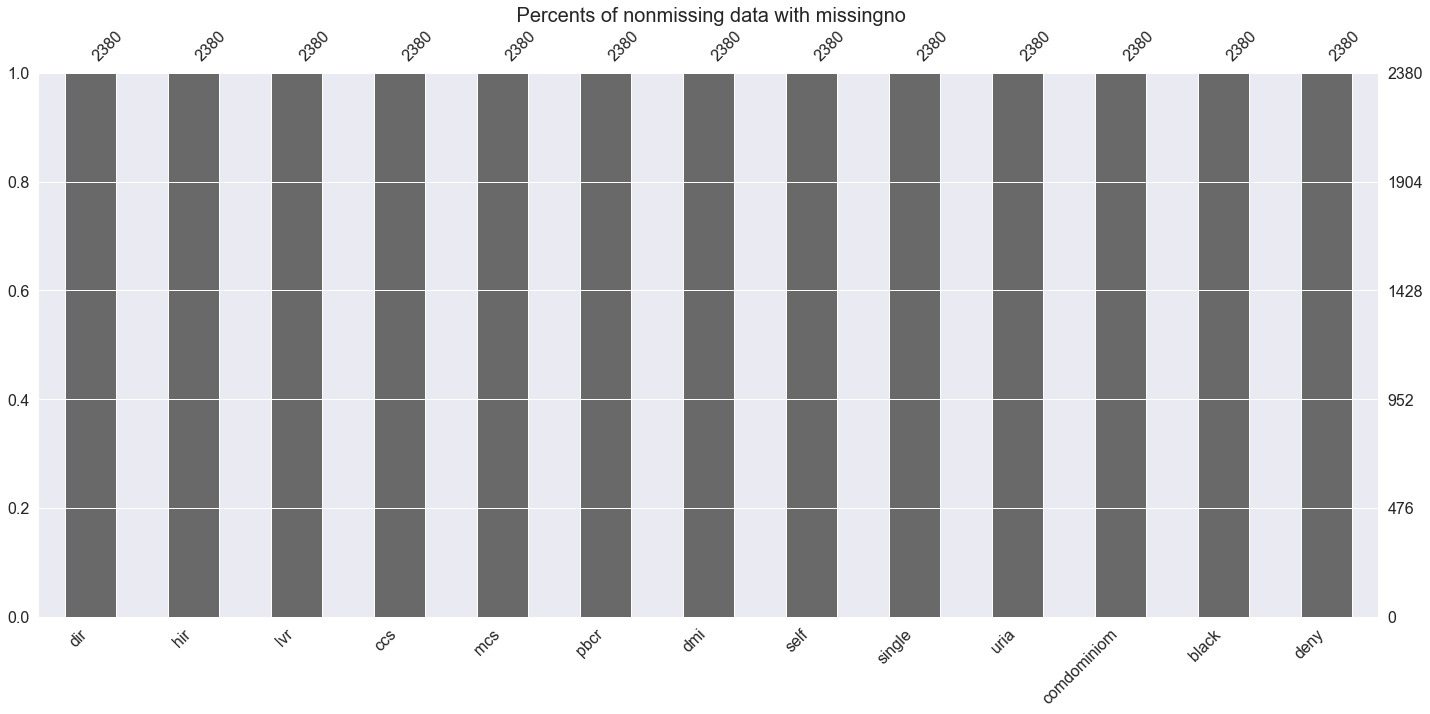

In [142]:
# recreate the bar charts to show percents of nonmissing databy missingo function
msno.bar(df1)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

#### 3. Rerun EDA

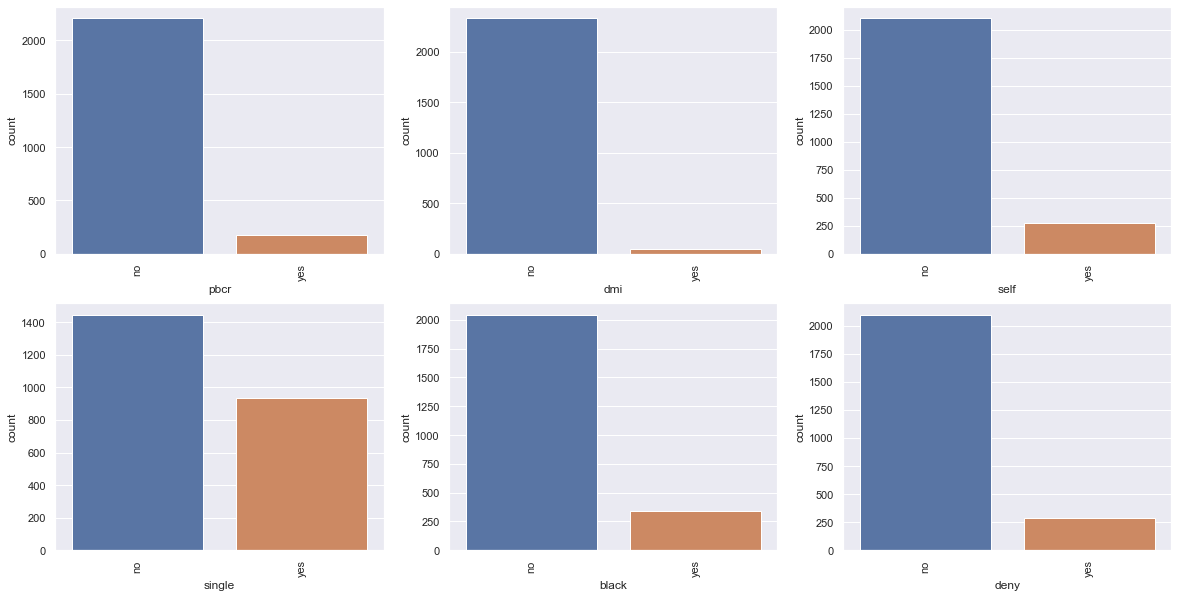

In [143]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df1[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

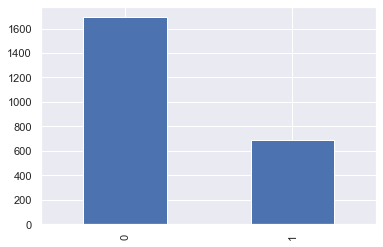

In [144]:
# create the bar chart for categorical value comdominiom
df1['comdominiom'].value_counts().plot(kind='bar')

#### Findings: 
>1. From this visualization, we can obviously see that the compression_ration, engine_size, horsepower, normalized_losses,price and wheel_base variables are strongly right skewed.
2. Since the scales of the numerical variables are different, we'll not remove outliers here.

Text(0.5, 1.0, 'Figure 5: Correlations')

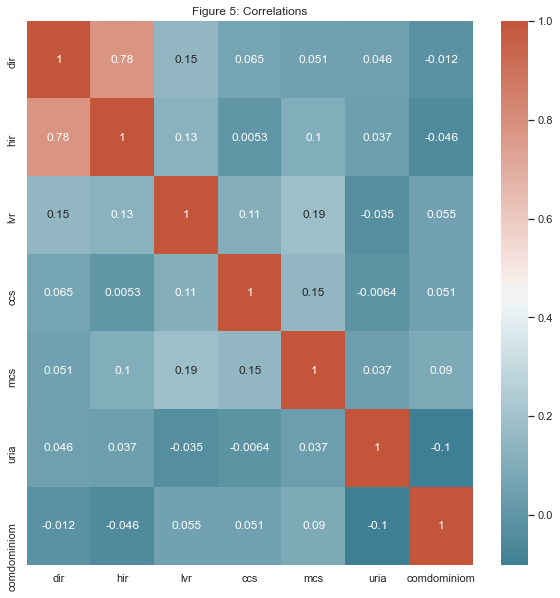

In [145]:
# rerun the correlation bewteen the Features.
plt.figure(figsize=(10,10))

corr = df1.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

1. According to the correlation, variable dr, ccs, pbcr, dmi, and black have the strongest relationships with deny even their correlations are no more than 0.36. These can be the first model exploratory variables.
2. The correlations of variable hir, lvr, and mcs are more than 0.1 and less than 0.2. 
3. There are multicollinearity between hir and dir, we will use VIF to do further analysis to if we need to delete any of them. 

***
### Step 4: Feature Engineering and Feature Selection

For this step, we'll perform:

Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - c. Reduce features further based on the results from the step 4a and VIFs, including Check VIF of all features and Drop feature based based on VIF. Then, Set up a final train and test datasets with the best features


#### 1 Encode categorical data - create dummy variables

We'll create dummy variables for categorical data and exclude the first dummy column.
The comdominiom has already to be dummy and numerical, we do not do anything for it.
Therefore, we'll create dummy features for categorical data by calling the `pd.get_dummies()` function.

>Steps:
1. We'll define the list of categorical features that we want to process.
2. We'll create dummy variables using `get_dummies()`, and we'll exclude the first dummy column to avoid dependency among the variables by using `drop_first=True`.
3. Results: the predictor variables increased from 13 to 10 after creating dummy variables.


In [146]:
# create dummy for the columns pbcr,dmi,self,single,black,and deny
df1= pd.get_dummies(df,columns=['pbcr','dmi','self','single','black','deny'], drop_first=True)
df1.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes,deny_yes
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0,0


#### 2. Split data into training and testing subsets

Before doing feature selection,we'll split data into training and testing subsets by using the `train_test_split` function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [147]:
# Create X and y
X = df1.drop(columns = "deny_yes")
y = df1[['deny_yes']]

In [148]:
# evaluate the model by splitting into train and test sets

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (1666, 12) (1666, 1)
Testing dataset shape: (715, 12) (715, 1)


#### 3 Scaling numerical values using Standard Scale (except dummy variables)

Since some variables have different scales, we'll use `StandardScaler` to remove the mean and scale the data to unit variance.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

We'll use `StandardScaler` for the train dataset, then do the same to the test dataset.


In [149]:
# set up numerical variables
Numerical_columns=['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']

In [150]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on the train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_train[i] = X_train[i].astype('float64')
    X_train[i] =  sc.fit_transform(X_train[i].values.reshape(-1,1))
    
X_train.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
1117,-1.418060,-1.215843,-3.911159,-0.659918,0.507029,-0.090586,0,0,0,0,0,0
46,-0.547748,0.029640,0.335098,2.330898,0.507029,-0.284378,0,1,0,0,0,0
1379,0.148502,-0.449392,0.972651,-0.659918,-1.365944,-0.332827,1,0,0,0,1,0
2214,0.815161,0.405201,0.227284,-0.659918,0.507029,-0.284378,1,0,0,0,1,1
105,0.148502,0.700284,1.051681,-0.659918,0.507029,0.054759,0,0,1,0,1,0


In [151]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on th train dataset
sc = StandardScaler()

for i in numerical_columns[:-1]:
    X_test[i] = X_test[i].astype('float64')
    X_test[i] =  sc.fit_transform(X_test[i].values.reshape(-1,1))
    
X_test.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_yes,dmi_yes,self_yes,single_yes,black_yes
2147,0.799353,-0.136807,0.380930,-0.088987,0.548508,-0.281895,0,0,0,0,0,0
1906,4.788370,5.417276,0.380930,2.332165,0.548508,-0.281895,1,1,0,0,1,1
347,-2.149052,-1.747571,-2.391459,-0.694275,-1.290318,-0.281895,0,0,0,0,0,0
786,-0.183449,-0.818795,0.215906,-0.088987,0.548508,-0.281895,0,0,0,0,1,1
14,-1.686557,-1.349524,-2.145987,-0.694275,-1.290318,-0.281895,0,0,0,0,0,0


#### 4. Feature Selection by using Correlation coefficients, RFECV, and VIFs.
a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds**

**Correlation Method**: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

In this case, an absolute correlation coefficient of >0.75 among two predictors indicates the presence of multicollinearity. 

Checking for multicollinearity is a very important step during the feature selection process. Multicollinearity can significantly reduce the model’s performance. Removing multicollinear features will both reduce the number of features and improve the model’s performance.

